# Prediction of Chronic Kidney Disease using Machine Learning

#### Kidney disease is a major chronic disease associated with aging, hypertension, and diabetes, affecting people 60 and over. Its major cause is the malfunctioning of the kidney in disposing toxins from the blood. This study analyzes chronic kidney disease using machine learning techniques based on a chronic kidney disease (CKD).

In [1]:
#Import required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the files 
df = pd.read_csv('kidney_disease.csv')

In [3]:
#View first five rows 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#Checking the shape of data
df.shape

(400, 26)

In [5]:
#Checking all info regarding data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [8]:
#Handling missing values using simple imputer

from sklearn.impute import SimpleImputer

In [9]:
imputer_model_object = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [10]:
df_wo_missing = pd.DataFrame(imputer_model_object.fit_transform(df))

In [11]:
df_wo_missing.columns = df.columns

In [12]:
df_wo_missing

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
df_wo_missing.isnull().sum()/len(df)*100

id                0.0
age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [14]:
#Checking  data under each column

for i in df_wo_missing.columns:
    print(f'*************************************************{i}**********************************************')
    print(set(df_wo_missing[i].unique()))

*************************************************id**********************************************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 2

In [15]:
#observations
#Few values can not be zero  ex:bp
#Some typo in categorical values like "dm" (\tyes) ,"classifcation"  observed

In [16]:
df_wo_missing['bp'] = df_wo_missing['bp'].replace(0.0,df_wo_missing['bp'].mean())
df_wo_missing['hemo'] = df_wo_missing['hemo'].replace(0.0,df_wo_missing['hemo'].mean())

In [17]:
df_wo_missing['dm'] =df_wo_missing['dm'].apply(lambda x : 'yes'if x == '\tyes' else x )
df_wo_missing['dm'] =df_wo_missing['dm'].apply(lambda x : 'no'if x == '\tno' else x )
df_wo_missing['dm'] =df_wo_missing['dm'].apply(lambda x : 'yes'if x == ' yes'  else x )
df_wo_missing['cad'] =df_wo_missing['cad'].apply(lambda x : 'no'if x == '\tno' else x )
df_wo_missing['classification'] = df_wo_missing['classification'].apply(lambda x : 'ckd'if x == 'ckd\t' else x )

In [18]:
df_wo_missing['wc'] =df_wo_missing['wc'].apply(lambda x : '9800'if x == '\t?' else x )
df_wo_missing['wc'] =df_wo_missing['wc'].apply(lambda x : '8400'if x == '\t8400' else x )
df_wo_missing['wc'] =df_wo_missing['wc'].apply(lambda x : '6200'if x == '\t6200' else x )

In [19]:
df_wo_missing['pcv'] =df_wo_missing['pcv'].apply(lambda x : '41'if x == '\t?' else x )
df_wo_missing['pcv'] =df_wo_missing['pcv'].apply(lambda x : '43'if x == '\t43' else x )

In [20]:
df_wo_missing['rc'] =df_wo_missing['rc'].apply(lambda x : '5.2'if x == '\t?' else x )

In [21]:
#Changing data types back to original

In [22]:
df.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [23]:
for i in df.select_dtypes(exclude='object').columns:
    df_wo_missing[i] = df_wo_missing[i].apply(lambda x :float(x))

In [24]:
df_wo_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [25]:
pd.set_option('display.max_columns',100)

In [26]:
df_wo_missing.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,135.0,3.5,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,0.8,135.0,3.5,11.3,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,135.0,3.5,9.6,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,76.2,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,135.0,3.5,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [27]:
#PCV,wc,rc are actually numeric values but showing as objects converting them to float

df_wo_missing['pcv'] = df_wo_missing['pcv'].astype(float)
df_wo_missing['wc'] = df_wo_missing['wc'].astype(float)
df_wo_missing['rc'] = df_wo_missing['rc'].astype(float)

In [28]:
df_wo_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

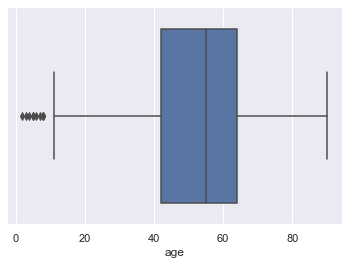

In [29]:
#EDA
sns.boxplot(df_wo_missing['age'])
plt.show()

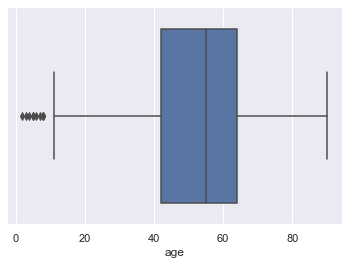

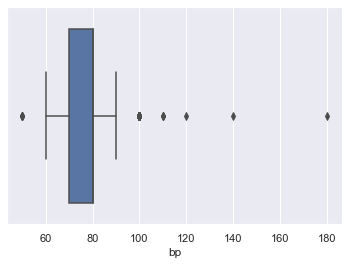

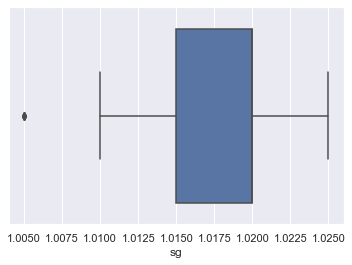

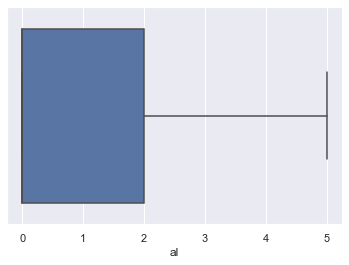

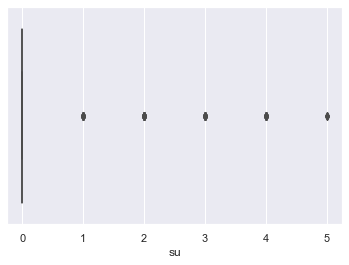

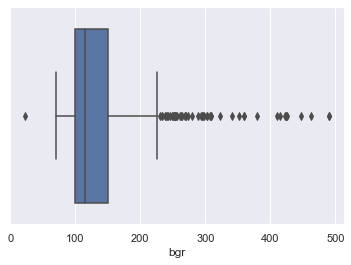

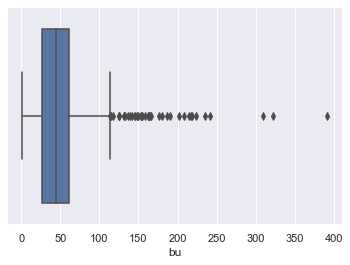

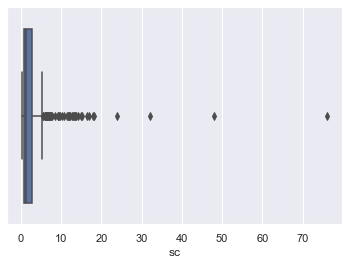

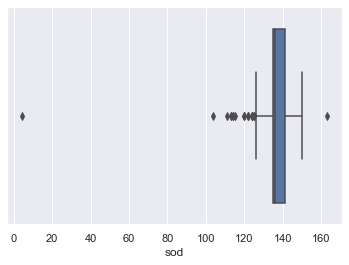

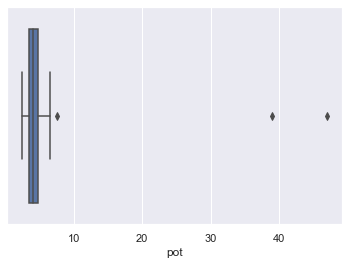

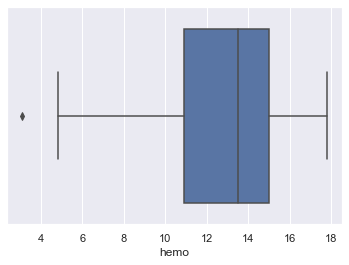

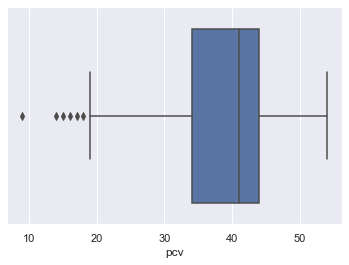

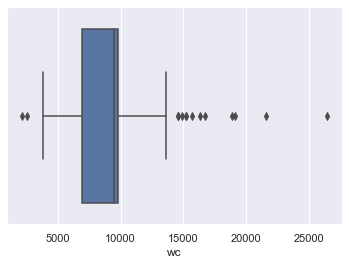

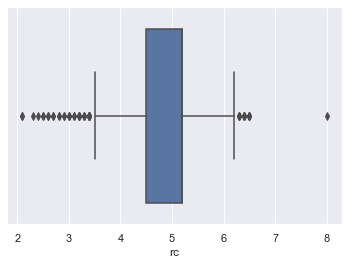

In [30]:
def boxplt(col):
    sns.boxplot(df_wo_missing[col])
    plt.show()
    
for i in list(df_wo_missing.select_dtypes(exclude='object').columns[1:]):
    boxplt(i)

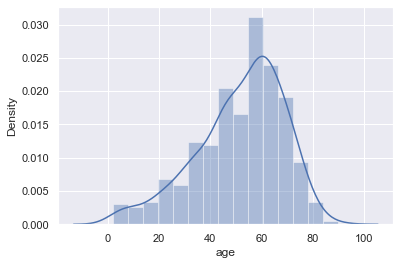

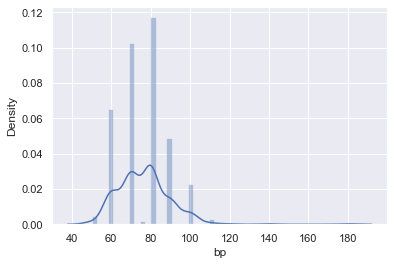

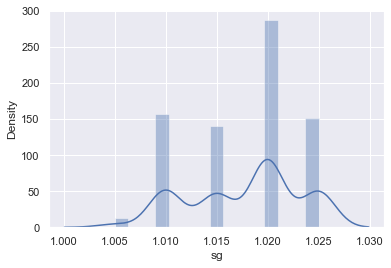

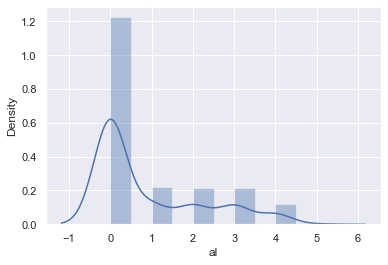

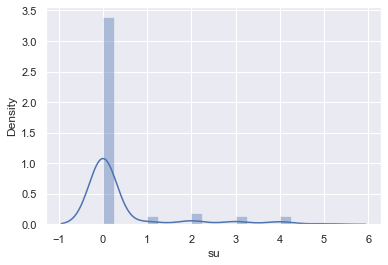

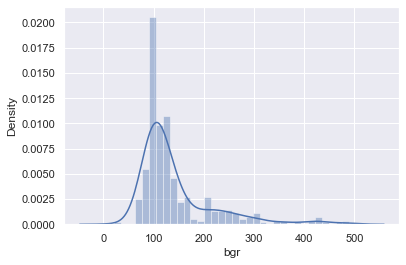

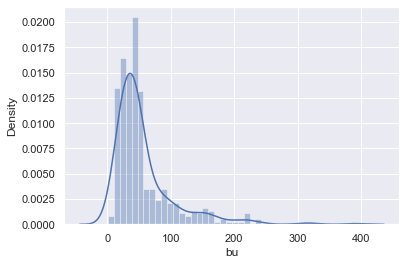

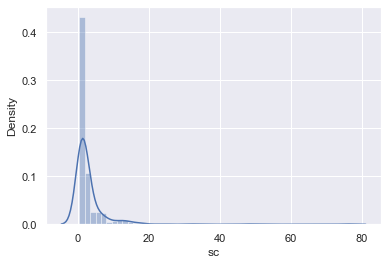

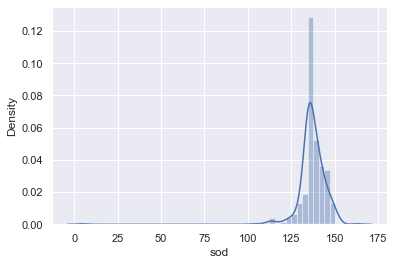

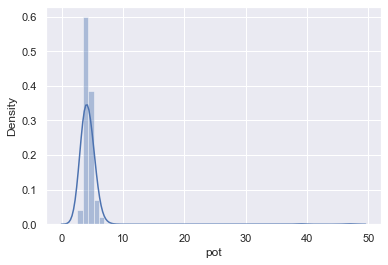

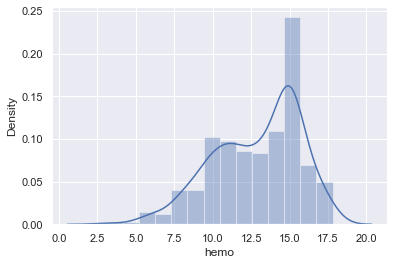

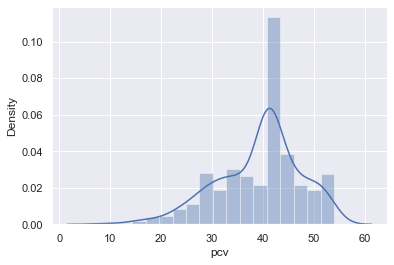

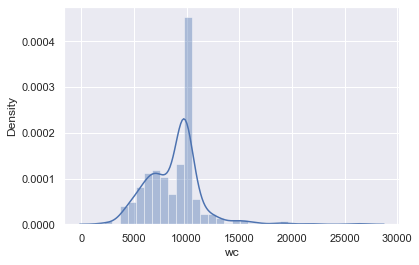

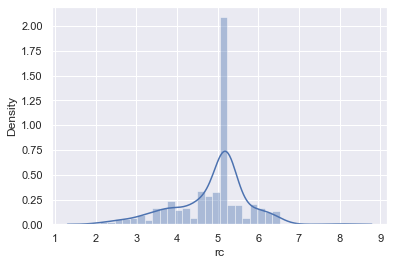

In [31]:
def distplot(col):
    sns.distplot(df_wo_missing[col])
    plt.show()
    
for i in list(df_wo_missing.select_dtypes(exclude='object').columns[1:]):
    distplot(i)

In [32]:
#Checking output data balance, Thumb rule 2*minor >= Major

df_wo_missing['classification'].value_counts()



ckd       250
notckd    150
Name: classification, dtype: int64

In [33]:
#Encoding data after spliting to dependent and independent 

In [34]:
x = df_wo_missing.drop(['classification'],axis=1)
y = df_wo_missing['classification']

In [35]:
x.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,no,no,no,good,no,no
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,no,yes,no,poor,no,yes
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,4.0,51.0,76.2,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [36]:
#one hot encoder and dummy varaible
x = pd.get_dummies(x,columns= ['rbc', 'pc', 'pcc', 'ba','htn', 'dm', 'cad','appet', 'pe', 'ane'],drop_first=True)

In [37]:
x.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,4.0,51.0,76.2,1.010,2.0,0.0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0


In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    float64
 1   age          400 non-null    float64
 2   bp           400 non-null    float64
 3   sg           400 non-null    float64
 4   al           400 non-null    float64
 5   su           400 non-null    float64
 6   bgr          400 non-null    float64
 7   bu           400 non-null    float64
 8   sc           400 non-null    float64
 9   sod          400 non-null    float64
 10  pot          400 non-null    float64
 11  hemo         400 non-null    float64
 12  pcv          400 non-null    float64
 13  wc           400 non-null    float64
 14  rc           400 non-null    float64
 15  rbc_normal   400 non-null    uint8  
 16  pc_normal    400 non-null    uint8  
 17  pcc_present  400 non-null    uint8  
 18  ba_present   400 non-null    uint8  
 19  htn_yes 

In [39]:
x.shape

(400, 25)

In [40]:
x.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes'],
      dtype='object')

In [41]:
x

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,4.0,51.0,76.2,1.010,2.0,0.0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,1,0,0,0,0,0,0,0,0
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,1,0,0,0,0,0,0,0,0
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,1,0,0,0,0,0,0,0,0
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,1,0,0,0,0,0,0,0,0


In [42]:
#x = x.drop(['id'],axis=1,inplace=True)

In [43]:
x1 = x.drop(['id'],axis=1)

In [44]:
x1

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,51.0,76.2,1.010,2.0,0.0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,1,0,0,0,0,0,0,0,0


In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [46]:
scalar = StandardScaler()
x_scaler = scalar.fit_transform(x1)

In [47]:
x_scaler

array([[-0.21616735,  0.25386407,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62783036, -1.97366508,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.60732733,  0.25386407, -1.4210744 , ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33372512,  0.25386407,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03961987, -1.23115536,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37204313,  0.25386407,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [48]:
#data splitting to test and train 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=1)

In [51]:
x_train.shape

(320, 24)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [54]:
list_met = []
list_accuracy = []

#logistic regression
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
y_prd_lr = lr.predict(x_test)
acuracy_lr =accuracy_score(y_test,y_prd_lr)

#Decision tree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_prd_dt = dt.predict(x_test)
acuracy_dt =accuracy_score(y_test,y_prd_dt)


#Random forest
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_prd_rf = rf.predict(x_test) 
acuracy_rf =accuracy_score(y_test,y_prd_rf)

#SVC
svc = SVC()
svc = svc.fit(x_train,y_train)
y_prd_svc = svc.predict(x_test)
acuracy_svc =accuracy_score(y_test,y_prd_svc)

#KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train,y_train)
y_prd_knn = knn.predict(x_test)
acuracy_knn =accuracy_score(y_test,y_prd_knn)

#GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train,y_train)
y_prd_nb = nb.predict(x_test)
acuracy_nb =accuracy_score(y_test,y_prd_nb)


#Combining all the models with voting classifer 

evc  = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf',rf),('svc',svc),('knn',knn),('nb',nb)],voting='hard')

mod_evc = evc.fit(x_train,y_train)

y_pred_evc = evc.predict(x_test)

accuracy_evc = accuracy_score(y_test,y_pred_evc)

In [55]:
list1 = ['Logistic regr','decison tree','random forest', 'support vector machines','K nearest','naive ba', 'voting classifer']
list2 = [acuracy_lr,acuracy_dt,acuracy_rf,acuracy_svc,acuracy_knn,acuracy_nb,accuracy_evc]
list3 = [lr,dt,rf,svc,knn,nb,evc]

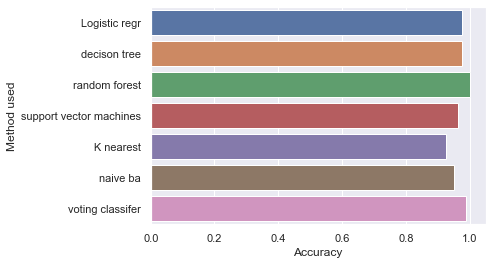

,Method used,Accuracy
0,Logistic regr,0.9750
1,decison tree,0.9750
2,random forest,1.0000
3,support vector machines,0.9625
4,K nearest,0.9250
5,naive ba,0.9500
6,voting classifer,0.9875


In [64]:
df_accuracy = pd.DataFrame({'Method used' :list1,'Accuracy' :list2})

sns.barplot(y= 'Method used' ,x = 'Accuracy',data= df_accuracy)
plt.show()

df_accuracy

In [65]:
#Checking the model from voting classifer 

y_pred_evc_xtrain = evc.predict(x_train)
y_pred_evc_xtest = evc.predict(x_test)

accuracy_evc_train = accuracy_score(y_train,y_pred_evc_xtrain)
accuracy_evc_test = accuracy_score(y_test,y_pred_evc_xtest)

print(accuracy_evc_train)
print('#####################################')
print(accuracy_evc_test)

0.996875
#####################################
0.9875


In [66]:
#Checking the model from voting classifer for recall and precision

y_pred_evc_xtrain = evc.predict(x_train)
y_pred_evc_xtest = evc.predict(x_test)

classification_evc_train = classification_report(y_train,y_pred_evc_xtrain)
classification_evc_test = classification_report(y_test,y_pred_evc_xtest)

print(classification_evc_train)
print('#####################################')
print(classification_evc_test)

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       203
      notckd       0.99      1.00      1.00       117

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

#####################################
              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        47
      notckd       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [67]:
#Hyper paremeter truning 

# Grid search CV

from sklearn.model_selection import GridSearchCV

In [ ]:
RandomForestClassifier()